In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv('data/Train.csv')
test_df = pd.read_csv('data/Test.csv')

train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [4]:
train_df.columns, test_df.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [5]:
#merge

In [6]:
train_df['source'] = 'train'
test_df['source'] = 'test'
test_df['Item_Outlet_Sales'] = 0
df = pd.concat([train_df, test_df], sort = False)
train_df.shape, test_df.shape, df.shape

((8523, 13), (5681, 13), (14204, 13))

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [9]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))
df['Item_Weight'].isnull().sum()

0

In [10]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', 
                                    columns='Outlet_Type',
                                    aggfunc=(lambda x:mode(x).mode[0]) )
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

df['Outlet_Size'].isnull().sum()

C:\AbhrajyotiPal\Anaconda\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0

In [11]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [12]:
df.nunique()

Item_Identifier               1559
Item_Weight                    628
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [13]:
cols = ['Item_Fat_Content', 
        'Item_Type', 
        'Outlet_Identifier', 
        'Outlet_Establishment_Year',
        'Outlet_Size',
        'Outlet_Location_Type',
        'Outlet_Type']

for col in cols:
    print('\n %s' %col)
    print(df[col].value_counts())


 Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 Outlet_Identifier
OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

 Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
19

In [14]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
def convert(x):
    if x in ['Low Fat', 'low fat', 'LF']: 
        return 'Low Fat'
    elif x in ['Regular', 'reg']:
        return 'Regular'
    else:
        return x
    
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(convert)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [16]:
(df['Item_Visibility'] == 0).sum()

879

In [17]:
visibility_avg = df.pivot_table(values='Item_Visibility',
                                index='Item_Identifier')
miss_bool = (df['Item_Visibility'] == 0)
df.loc[miss_bool,'Item_Visibility'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

(df['Item_Visibility'] == 0).sum()

0

In [18]:
df['Years'] = 2019 - df['Outlet_Establishment_Year']
df['Years'].describe()

count    14204.000000
mean        21.169319
std          8.371664
min         10.000000
25%         15.000000
50%         20.000000
75%         32.000000
max         34.000000
Name: Years, dtype: float64

In [19]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [20]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                         'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [21]:
df.loc[df['Item_Type_Combined'] == "Non-Consumable",
       'Item_Fat_Content'] = "Non-Consumable"
df['Item_Fat_Content'].value_counts()

Low Fat           6499
Regular           5019
Non-Consumable    2686
Name: Item_Fat_Content, dtype: int64

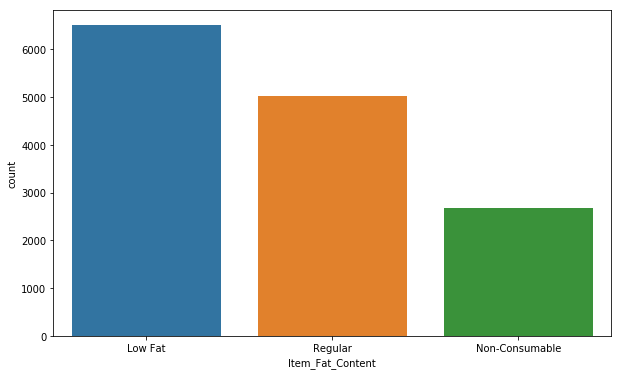

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(df['Item_Fat_Content'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

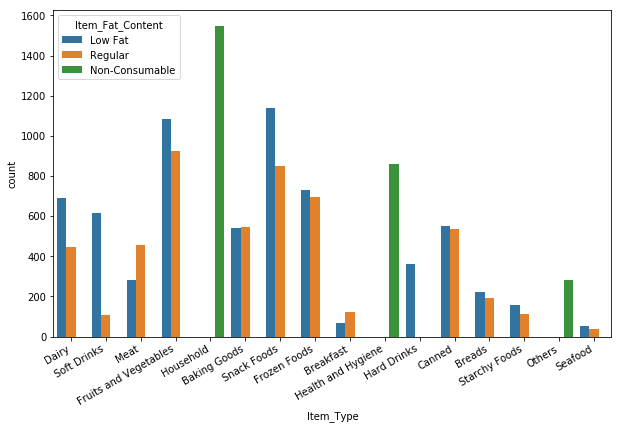

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(df['Item_Type'], 
              hue = df['Item_Fat_Content'])
plt.xticks(rotation = 30, ha = 'right')

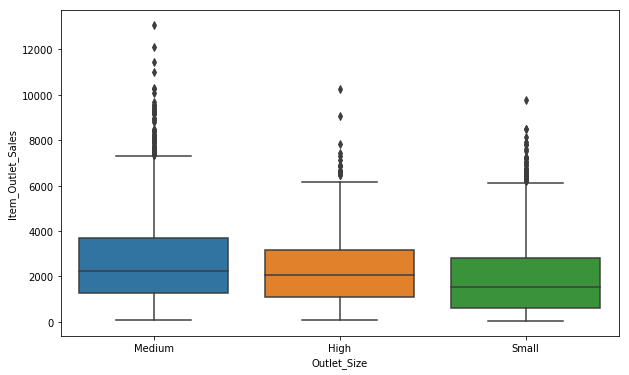

In [24]:
plt.figure(figsize = (10,6))
sns.boxplot(x = train_df['Outlet_Size'],
            y = train_df['Item_Outlet_Sales'])

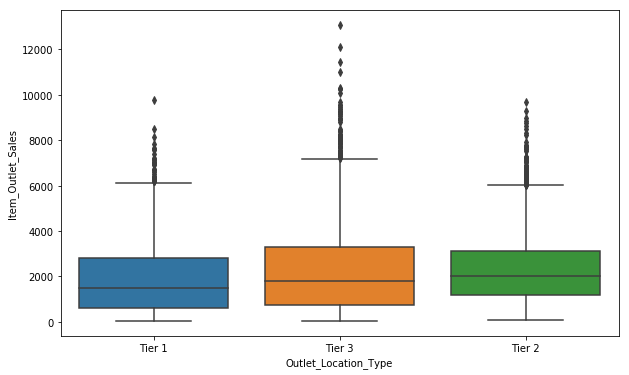

In [25]:
plt.figure(figsize = (10,6))
sns.boxplot(x = train_df['Outlet_Location_Type'],
            y = train_df['Item_Outlet_Sales'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

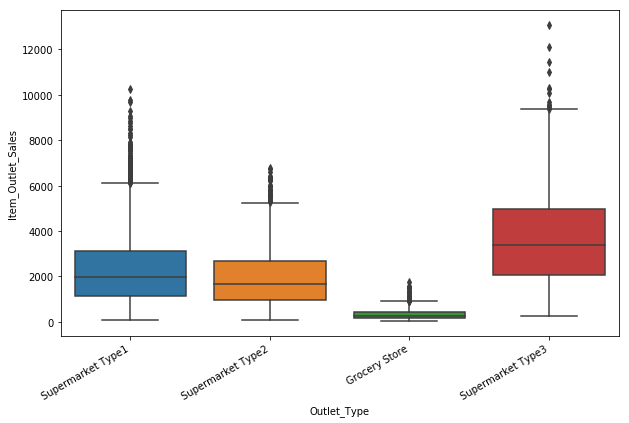

In [26]:
plt.figure(figsize = (10,6))
sns.boxplot(x = train_df['Outlet_Type'],
            y = train_df['Item_Outlet_Sales'])
plt.xticks(rotation = 30, ha = 'right')

In [27]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Years                          int64
Item_Type_Combined            object
dtype: object

In [28]:
encoder = LabelEncoder()
df['Outlet'] = encoder.fit_transform(df['Outlet_Identifier'])
cols = ['Item_Fat_Content',
        'Outlet_Location_Type',
        'Outlet_Size',
        'Item_Type_Combined',
        'Outlet_Type',
        'Outlet']

for col in cols:
    df[col] = encoder.fit_transform(df[col])

In [29]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content',
                                   'Outlet_Location_Type',
                                   'Outlet_Size',
                                   'Outlet_Type',
                                   'Item_Type_Combined',
                                   'Outlet'])

In [30]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Years                          int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,20,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,10,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,20,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,21,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,train,32,...,0,1,0,0,0,0,0,0,0,0


In [32]:
df.drop(['Item_Type', 'Outlet_Establishment_Year'],
       axis = 1,
       inplace = True)
del train_df
del test_df
train_df = df.loc[df['source'] == "train"]
test_df = df.loc[df['source'] == "test"]
test_df.drop(['Item_Outlet_Sales', 'source'],
            axis = 1,
            inplace = True)
train_df.drop(['source'],
             axis = 1,
             inplace = True)

C:\AbhrajyotiPal\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
y = train_df['Item_Outlet_Sales']
X = train_df.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'],
                 axis = 1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 2, 
                                                  test_size = 0.2)

In [43]:
def fitmodel(model = None):
    model.fit(train_X, train_y)
    val_pred = model.predict(val_X)
    print(mean_absolute_error(val_y, val_pred))

In [73]:
model1 = LinearRegression(normalize = True)
fitmodel(model1)

873.8877067448681


In [74]:
model2 = Ridge(alpha = 0.001, normalize = True)
fitmodel(model2)

872.8573678134512


In [78]:
model3 = DecisionTreeRegressor(max_depth = 30,
                              min_samples_leaf = 10)
fitmodel(model3)

860.0940399310218


In [79]:
model4 = RandomForestRegressor(n_estimators = 200, 
                               max_depth = 5,
                               min_samples_leaf = 100,
                               n_jobs = 4)
fitmodel(model4)

797.0854660773259
